In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
# melakukan download file dalam bentuk zip
!wget --no-check-certificate \
https://afandistudio.net/prak_ai/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2024-05-28 06:52:36--  https://afandistudio.net/prak_ai/rockpaperscissors.zip
Resolving afandistudio.net (afandistudio.net)... 45.130.231.248
Connecting to afandistudio.net (afandistudio.net)|45.130.231.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.30MB/s    in 2m 33s  

2024-05-28 06:55:10 (2.02 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakkukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'paper', 'scissors']

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [ ]:
# membuat nama directori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# memecah direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

# memecah direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)


In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
# meng copy data train dan data val ke directory baru
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

580

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

146

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

600

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

150

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

569

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

143

In [ ]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
# membuat model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose=2
)

Epoch 1/20
25/25 - 15s - loss: 1.1015 - accuracy: 0.3762 - val_loss: 0.9500 - val_accuracy: 0.6625 - 15s/epoch - 615ms/step
Epoch 2/20
25/25 - 9s - loss: 0.6531 - accuracy: 0.7300 - val_loss: 0.4384 - val_accuracy: 0.8313 - 9s/epoch - 379ms/step
Epoch 3/20
25/25 - 11s - loss: 0.3421 - accuracy: 0.8825 - val_loss: 0.2878 - val_accuracy: 0.9062 - 11s/epoch - 438ms/step
Epoch 4/20
25/25 - 11s - loss: 0.2338 - accuracy: 0.9237 - val_loss: 0.1554 - val_accuracy: 0.9438 - 11s/epoch - 425ms/step
Epoch 5/20
25/25 - 11s - loss: 0.1986 - accuracy: 0.9303 - val_loss: 0.2620 - val_accuracy: 0.9062 - 11s/epoch - 423ms/step
Epoch 6/20
25/25 - 9s - loss: 0.2023 - accuracy: 0.9225 - val_loss: 0.3301 - val_accuracy: 0.8750 - 9s/epoch - 344ms/step
Epoch 7/20
25/25 - 8s - loss: 0.2299 - accuracy: 0.9290 - val_loss: 0.1231 - val_accuracy: 0.9563 - 8s/epoch - 318ms/step
Epoch 8/20
25/25 - 9s - loss: 0.1634 - accuracy: 0.9430 - val_loss: 0.1321 - val_accuracy: 0.9563 - 9s/epoch - 354ms/step
Epoch 9/20
25/25

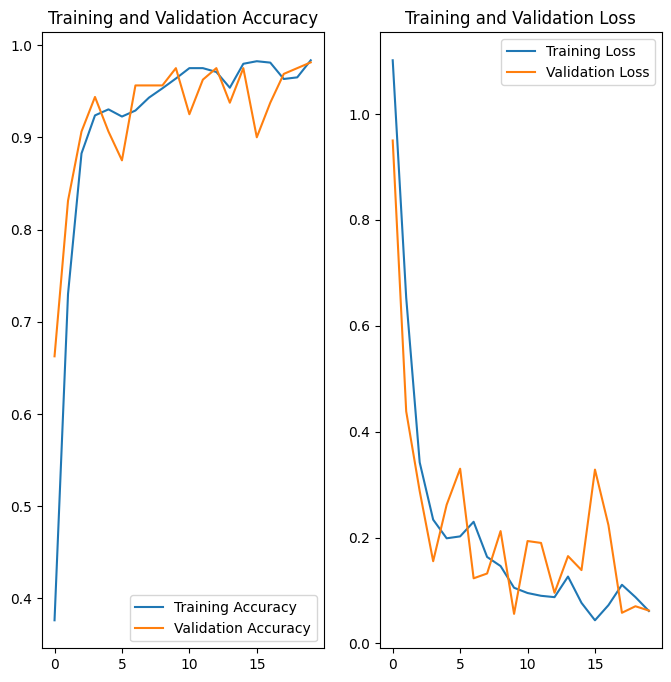

In [ ]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

dapat dilihat dari grafik bahwa accuracy dan vall accuracy tidak berjarak jauh dan dari waktu ke waktu semakin meningkat sehingga tidak terjadi overfitting. Dan nilai loss dan val loss juga dari waktu ke waktu semakin turun sehingga model yang digunakan cukup bagus.

---


Ada beberapa pilihan untuk menghindari overfitting selain image augmentation, yaitu:

1. Menambah lagi convolution layer dan max pooling.  Kita bisa mengurangi jarak antara val_acc dengan acc dengan menambah layer ini.
2. Pilihan kedua adalah melakukan modifikasi pada DataImageGenerator


Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
1/1 [==============================] - 0s 444ms/step
Rock-paper-scissors_(paper).png
paper


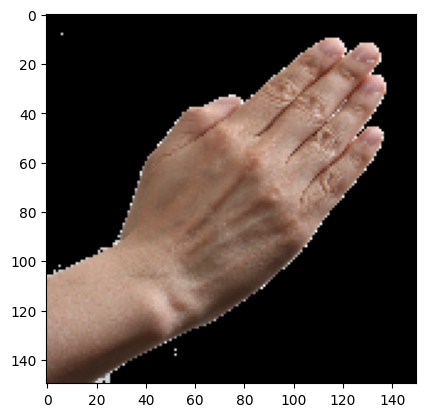

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')